# **Gradio Installation**

# **Import necessary libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls

In [2]:
batch_Size = 32
image_Size = 196
epochs = 10
channels = 3

# **Data spliting**

In [3]:
data_dir = "/kaggle/input/fire-dataset/fire_dataset"

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [6]:
train_ds

<BatchDataset shapes: ((None, 196, 196, 3), (None,)), types: (tf.float32, tf.int32)>

In [7]:
labels = train_ds.class_names
labels

['fire_images', 'non_fire_images']

# **Data Visualization**

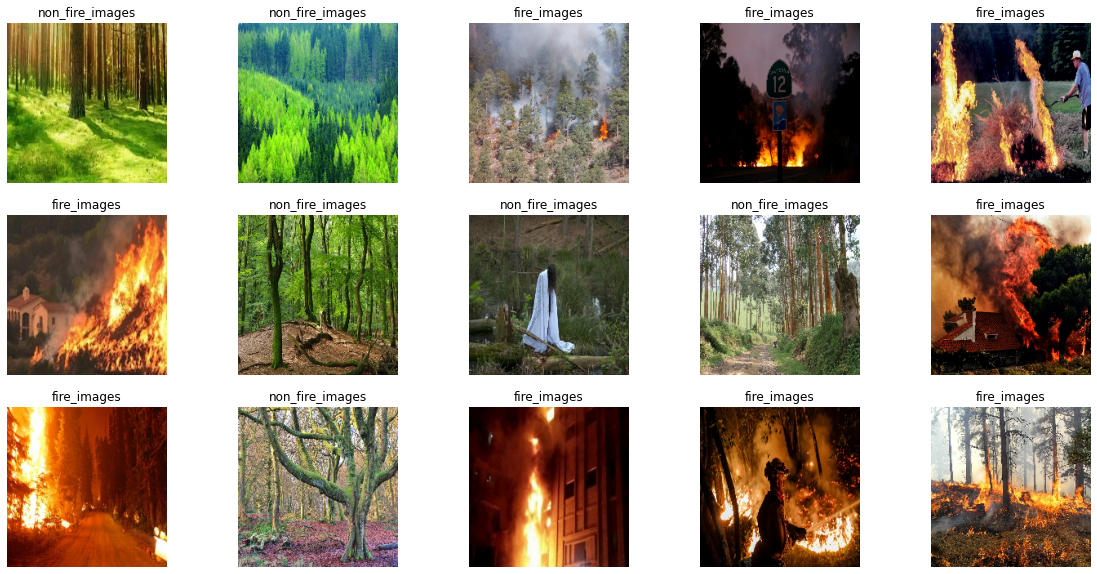

In [8]:
plt.figure(figsize=(20,10))
for imgBatch, labelBatch in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(imgBatch[i].numpy().astype('uint8'))
        plt.title(labels[labelBatch[i]])
        plt.axis("off")
        cls()

# **Scaling and Modelling**

In [9]:
scaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(196, 196),
    layers.experimental.preprocessing.Rescaling(1./255.)
])

In [10]:
model = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])



In [11]:
model.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:16 - loss: 0.6620 - accuracy: 0.5469

Cleanup called...


 4/25 [===>..........................] - ETA: 58s - loss: 0.6428 - accuracy: 0.6172 

Cleanup called...


 6/25 [======>.......................] - ETA: 49s - loss: 0.5772 - accuracy: 0.6823

Cleanup called...


 8/25 [========>.....................] - ETA: 43s - loss: 0.5524 - accuracy: 0.7031

Cleanup called...


 9/25 [=========>....................] - ETA: 40s - loss: 0.5497 - accuracy: 0.6944

Cleanup called...


11/25 [============>.................] - ETA: 35s - loss: 0.5353 - accuracy: 0.7159

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.7400

Cleanup called...


25/25 [==============================] - 69s 3s/step - loss: 0.3923 - accuracy: 0.7400 - val_loss: 0.2927 - val_accuracy: 0.7538
Epoch 2/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 3/25 [==>...........................] - ETA: 1:02 - loss: 0.2904 - accuracy: 0.8333

Cleanup called...


 4/25 [===>..........................] - ETA: 59s - loss: 0.2761 - accuracy: 0.8594 

Cleanup called...


 6/25 [======>.......................] - ETA: 50s - loss: 0.3221 - accuracy: 0.8646

Cleanup called...


 8/25 [========>.....................] - ETA: 43s - loss: 0.3076 - accuracy: 0.8789

Cleanup called...


 9/25 [=========>....................] - ETA: 40s - loss: 0.2998 - accuracy: 0.8924

Cleanup called...


11/25 [============>.................] - ETA: 35s - loss: 0.3515 - accuracy: 0.8892

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.9013

Cleanup called...


25/25 [==============================] - 67s 3s/step - loss: 0.3132 - accuracy: 0.9013 - val_loss: 0.4267 - val_accuracy: 0.8894
Epoch 3/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:10 - loss: 0.4345 - accuracy: 0.8750

Cleanup called...


 4/25 [===>..........................] - ETA: 57s - loss: 0.3244 - accuracy: 0.9297 

Cleanup called...


 6/25 [======>.......................] - ETA: 49s - loss: 0.2885 - accuracy: 0.9427

Cleanup called...


 8/25 [========>.....................] - ETA: 43s - loss: 0.2835 - accuracy: 0.9336

Cleanup called...


 9/25 [=========>....................] - ETA: 40s - loss: 0.2941 - accuracy: 0.9306

Cleanup called...


11/25 [============>.................] - ETA: 35s - loss: 0.2802 - accuracy: 0.9375

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.9413

Cleanup called...


25/25 [==============================] - 68s 3s/step - loss: 0.2679 - accuracy: 0.9413 - val_loss: 0.3440 - val_accuracy: 0.9095
Epoch 4/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:11 - loss: 0.3429 - accuracy: 0.8438

Cleanup called...


 4/25 [===>..........................] - ETA: 59s - loss: 0.3653 - accuracy: 0.8281 

Cleanup called...


 6/25 [======>.......................] - ETA: 50s - loss: 0.3432 - accuracy: 0.8542

Cleanup called...


 8/25 [========>.....................] - ETA: 43s - loss: 0.3231 - accuracy: 0.8828

Cleanup called...


 9/25 [=========>....................] - ETA: 40s - loss: 0.3087 - accuracy: 0.8889

Cleanup called...


11/25 [============>.................] - ETA: 35s - loss: 0.2932 - accuracy: 0.9006

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.2750 - accuracy: 0.9250

Cleanup called...


25/25 [==============================] - 67s 3s/step - loss: 0.2750 - accuracy: 0.9250 - val_loss: 0.2069 - val_accuracy: 0.9648
Epoch 5/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:11 - loss: 0.2286 - accuracy: 0.9531

Cleanup called...


 4/25 [===>..........................] - ETA: 56s - loss: 0.2123 - accuracy: 0.9609 

Cleanup called...


 6/25 [======>.......................] - ETA: 48s - loss: 0.1977 - accuracy: 0.9583

Cleanup called...


 8/25 [========>.....................] - ETA: 42s - loss: 0.1926 - accuracy: 0.9609

Cleanup called...


 9/25 [=========>....................] - ETA: 39s - loss: 0.1906 - accuracy: 0.9618

Cleanup called...


11/25 [============>.................] - ETA: 34s - loss: 0.1769 - accuracy: 0.9602

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.1322 - accuracy: 0.9663

Cleanup called...


25/25 [==============================] - 67s 3s/step - loss: 0.1322 - accuracy: 0.9663 - val_loss: 0.1071 - val_accuracy: 0.9447
Epoch 6/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:09 - loss: 0.1406 - accuracy: 0.9375

Cleanup called...


 4/25 [===>..........................] - ETA: 55s - loss: 0.1252 - accuracy: 0.9453 

Cleanup called...


 6/25 [======>.......................] - ETA: 48s - loss: 0.1275 - accuracy: 0.9479

Cleanup called...


 8/25 [========>.....................] - ETA: 42s - loss: 0.1377 - accuracy: 0.9414

Cleanup called...


 9/25 [=========>....................] - ETA: 39s - loss: 0.1259 - accuracy: 0.9479

Cleanup called...


11/25 [============>.................] - ETA: 34s - loss: 0.1542 - accuracy: 0.9403

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.1509 - accuracy: 0.9475

Cleanup called...


25/25 [==============================] - 66s 3s/step - loss: 0.1509 - accuracy: 0.9475 - val_loss: 0.1736 - val_accuracy: 0.9598
Epoch 7/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:11 - loss: 0.2983 - accuracy: 0.9062

Cleanup called...


 4/25 [===>..........................] - ETA: 59s - loss: 0.2197 - accuracy: 0.9375 

Cleanup called...


 6/25 [======>.......................] - ETA: 49s - loss: 0.2032 - accuracy: 0.9375

Cleanup called...


 8/25 [========>.....................] - ETA: 43s - loss: 0.1775 - accuracy: 0.9414

Cleanup called...


 9/25 [=========>....................] - ETA: 40s - loss: 0.1693 - accuracy: 0.9444

Cleanup called...


11/25 [============>.................] - ETA: 34s - loss: 0.1578 - accuracy: 0.9432

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9625

Cleanup called...


25/25 [==============================] - 67s 3s/step - loss: 0.1206 - accuracy: 0.9625 - val_loss: 0.2044 - val_accuracy: 0.9347
Epoch 8/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:08 - loss: 0.0632 - accuracy: 0.9844

Cleanup called...


 4/25 [===>..........................] - ETA: 55s - loss: 0.0641 - accuracy: 0.9844 

Cleanup called...


 6/25 [======>.......................] - ETA: 48s - loss: 0.0698 - accuracy: 0.9792

Cleanup called...


 8/25 [========>.....................] - ETA: 42s - loss: 0.1086 - accuracy: 0.9570

Cleanup called...


 9/25 [=========>....................] - ETA: 40s - loss: 0.1001 - accuracy: 0.9618

Cleanup called...


11/25 [============>.................] - ETA: 34s - loss: 0.0857 - accuracy: 0.9688

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0998 - accuracy: 0.9600

Cleanup called...


25/25 [==============================] - 67s 3s/step - loss: 0.0998 - accuracy: 0.9600 - val_loss: 0.1161 - val_accuracy: 0.9648
Epoch 9/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 3/25 [==>...........................] - ETA: 1:01 - loss: 0.0961 - accuracy: 0.9688

Cleanup called...


 4/25 [===>..........................] - ETA: 58s - loss: 0.0782 - accuracy: 0.9766 

Cleanup called...


 6/25 [======>.......................] - ETA: 49s - loss: 0.0763 - accuracy: 0.9740

Cleanup called...


 8/25 [========>.....................] - ETA: 43s - loss: 0.0833 - accuracy: 0.9727

Cleanup called...


 9/25 [=========>....................] - ETA: 40s - loss: 0.0770 - accuracy: 0.9757

Cleanup called...


11/25 [============>.................] - ETA: 34s - loss: 0.0694 - accuracy: 0.9801

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0705 - accuracy: 0.9762

Cleanup called...


25/25 [==============================] - 68s 3s/step - loss: 0.0705 - accuracy: 0.9762 - val_loss: 0.1777 - val_accuracy: 0.9246
Epoch 10/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 1:11 - loss: 0.1388 - accuracy: 0.9062

Cleanup called...


 4/25 [===>..........................] - ETA: 56s - loss: 0.1115 - accuracy: 0.9375 

Cleanup called...


 6/25 [======>.......................] - ETA: 48s - loss: 0.1127 - accuracy: 0.9479

Cleanup called...


 8/25 [========>.....................] - ETA: 42s - loss: 0.1070 - accuracy: 0.9570

Cleanup called...


 9/25 [=========>....................] - ETA: 39s - loss: 0.1105 - accuracy: 0.9549

Cleanup called...


11/25 [============>.................] - ETA: 34s - loss: 0.1000 - accuracy: 0.9602

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0898 - accuracy: 0.9725

Cleanup called...


25/25 [==============================] - 66s 3s/step - loss: 0.0898 - accuracy: 0.9725 - val_loss: 0.1355 - val_accuracy: 0.9698


# **Visualized Evaluation**

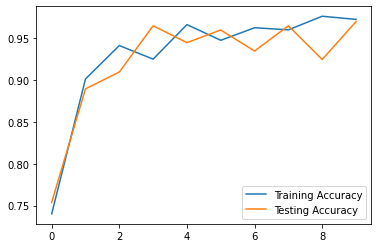

In [12]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

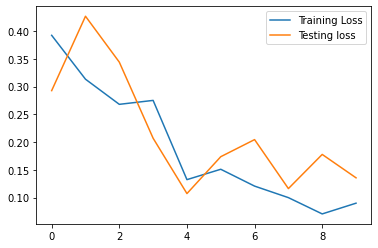

In [13]:

plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [14]:
def PredictIMG(data, classes, model):
    
    for imgs, lab in iter(data):
        label = np.array(lab)
        
        for i in range(len(imgs)):
            
            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]
            
            pred = model.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]
#             title = f"True : {lab}\nPred : {predlab}"
#             print("true: ",Tlab, "pred: ",predlab)
        
            
    

In [15]:
PredictIMG(val_ds, labels, model)

Cleanup called...


In [16]:
model.evaluate(val_ds)

Cleanup called...


7/7 [==============================] - 5s 475ms/step - loss: 0.1355 - accuracy: 0.9698


[0.13551215827465057, 0.9698492288589478]

In [17]:
model.save("model.h5")

# **Gradio ETE Modelization**

In [18]:
# def predict_input_image(img):
#     class_names = ['fire_images', 'non_fire_images']
#     img_4d=img.reshape(-1,196, 196,3)
#     prediction=model.predict(img_4d)[0]
#     if prediction>0.5:
#         pred = [1-prediction, prediction]
#     else:
#          pred = [1-prediction, prediction]
# #     predlab = classes[pred]
    
#     confidences = {class_names[i]: float(pred[i]) for i in range(2)}
#     print()
#     return confidences

In [19]:
# image = gr.inputs.Image(shape=(196, 196))
# label = gr.outputs.Label(num_top_classes=1)

In [20]:
# gr.Interface(fn=predict_input_image, 
# inputs=image, outputs=label,interpretation='default').launch(debug='True', share='True')